In [83]:
import logging

logging.basicConfig(level=logging.DEBUG, format='%(message)s')

logging.debug('Hello Debug')
logging.info('Hello Info')
logging.warning('Hello Warning')
logging.error('Hello Error')
logging.critical('Hello Critical')

Hello Debug
Hello Info
Hello Warning
Hello Error
Hello Critical


In [84]:
from svm import *
from svmutil import *
import numpy as np
import math

In [85]:
#label, dataset = svm_read_problem('../heart_scale')

In [86]:
label, dataset = svm_read_problem('toydata.dat')

logging.debug("Length of label: {}".format(len(label)))
logging.debug("Label: {}".format(label))
logging.debug("Length of data: {}".format(len(dataset)))
logging.debug("Data: {}".format(dataset))

Length of label: 63
Label: [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
Length of data: 63
Data: [{1: 0.202, 2: 0.454}, {1: 0.27, 2: 0.374}, {1: 0.276, 2: 0.304}, {1: 0.276, 2: 0.268}, {1: 0.278, 2: 0.218}, {1: 0.378, 2: 0.18}, {1: 0.412, 2: 0.226}, {1: 0.382, 2: 0.332}, {1: 0.368, 2: 0.284}, {1: 0.326, 2: 0.38}, {1: 0.3, 2: 0.514}, {1: 0.142, 2: 0.426}, {1: 0.21, 2: 0.294}, {1: 0.202, 2: 0.246}, {1: 0.308, 2: 0.17}, {1: 0.496, 2: 0.18}, {1: 0.424, 2: 0.254}, {1: 0.342, 2: 0.24}, {1: 0.314, 2: 0.306}, {1: 0.304, 2: 0.432}, {1: 0.216, 2: 0.38}, {1: 0.274, 2: 0.448}, {1: 0.636, 2: 0.366}, {1: 0.514, 2: 0.272}, {1: 0.48, 2: 0.346}, {1: 0.476, 2: 0.41}, {1: 0.564, 2: 0.354}, {1: 0.412, 2: 0.404}, {1: 0.616, 2: 0.832}, {1: 0

In [87]:
maxdim = np.max(np.array([len(d_item) for d_item in dataset]))
for data_idx, _ in enumerate(dataset):
    for dim_idx in range(maxdim):
        if dim_idx + 1 not in dataset[data_idx]:
            print("add key {} in data {}".format(dim_idx+1, data_idx))
            dataset[data_idx][dim_idx+1] = 0

In [88]:
logging.debug("Length of Data: {}, Dimension of Data: {}".format(len(dataset), len(dataset[0])))
#logging.debug("Read Data in One Line:\n{}".format(
#    np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) 
#              for dim_idx, feat_idx in enumerate(data_list)]).reshape(len(dataset), len(dataset[0]))))

Length of Data: 63, Dimension of Data: 2


In [89]:
import time

C_cost = 1000
start_time = time.time()
model = svm_train(label[:400], dataset[:400], '-s 0 -t 0 -c {}'.format(C_cost))
end_time = time.time()
print(end_time - start_time)

#p_label, p_acc, p_val = svm_predict(y[200:], x[200:], model)
# using the same data set as training, just for development stage
p_label, p_acc, p_val = svm_predict(label[:400], dataset[:400], model)
logging.debug("Accuracy: {}".format(p_acc))
logging.debug("Output Label: {}".format(p_label))
logging.debug("Model Value: {}".format(p_val))

yi =np.array([1 if val >= 0 else -1 for [val] in p_val])
logging.debug("Yi(+1/-1): {}".format(yi))

Accuracy: (100.0, 0.0, 1.0)
Output Label: [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
Model Value: [[2.755143830434257], [3.6068442231354467], [4.753017373867763], [5.365602558019475], [6.201427078005594], [6.098632983380831], [5.0610852398134725], [3.4821857342911358], [4.403883630287737], [3.0850760905995145], [0.9997449702878072], [3.6812460470676243], [5.417791705765708], [6.294524894421869], [6.793383786839058], [5.214327072352454], [4.494700681903524], [5.347445920503887], [4.434208383814415], [2.3651014181841674], [3.909429058507328], [2.317664873041096], [1.000127116292063], [3.5139374797212923], [2.509534609449645], [1.450470753629105], [1.7438986657610656], [2.032191829285594], [-6.7795654096479865], [-4.9143

0.0029921531677246094
Accuracy = 100% (63/63) (classification)


In [90]:
svm_type = model.get_svm_type()
logging.debug("SVM Type: {}".format(svm_type))

nr_class = model.get_nr_class()
logging.debug("Number of Class: {}".format(nr_class))

svr_probability = model.get_svr_probability()
logging.debug("SVM Probability: {}".format(svr_probability))

class_labels = model.get_labels()
logging.debug("Class Labels: {}".format(class_labels))

sv_indices = model.get_sv_indices()
logging.debug("Support Vectors Indices: {}".format(sv_indices))

nr_sv = model.get_nr_sv()
logging.debug("Number of Support Vectors: {}".format(nr_sv))

is_prob_model = model.is_probability_model()
logging.debug("Is Probability Model: {}".format(is_prob_model))

support_vector_coefficients = model.get_sv_coef()
logging.debug("Support Vector Coefficients: {}".format(support_vector_coefficients))

support_vectors = model.get_SV()
logging.debug("Support Vectors: {}".format(support_vectors))

SVM Type: 0
Number of Class: 2
SVM Probability: 0.0
Class Labels: [2, 3]
Support Vectors Indices: [11, 23, 60]
Number of Support Vectors: 3
Is Probability Model: False
Support Vector Coefficients: [(104.62659496012338,), (68.25101764319216,), (-172.87761260331555,)]
Support Vectors: [{1: 0.3, 2: 0.514}, {1: 0.636, 2: 0.366}, {1: 0.476, 2: 0.554}]


In [91]:
for data_idx, _ in enumerate(support_vectors):
    for dim_idx in range(maxdim):
        if dim_idx + 1 not in support_vectors[data_idx]:
            print("add key {} in support_vectors {}".format(dim_idx+1, data_idx))
            support_vectors[data_idx][dim_idx+1] = 0

In [92]:
for sv_idx, data_idx in enumerate(sv_indices):
    logging.debug("Support Vector Indices: {}, Data Indices: {}".format(sv_idx, data_idx))
    logging.debug("Support Vectors from SV: {}, Support Vectors Coeff: {}, Support Vectors from Data: {}, Yi: {}, Model Output: {}".format(
        support_vectors[sv_idx], support_vector_coefficients[sv_idx], dataset[data_idx-1], yi[data_idx-1], p_val[data_idx-1]))
    
for i in support_vectors:
    logging.debug("Support Vectors from SV: {}".format(i))

for i in support_vector_coefficients:
    logging.debug("Support Vectors Coeff: {}".format(i))

Support Vector Indices: 0, Data Indices: 11
Support Vectors from SV: {1: 0.3, 2: 0.514}, Support Vectors Coeff: (104.62659496012338,), Support Vectors from Data: {1: 0.3, 2: 0.514}, Yi: 1, Model Output: [0.9997449702878072]
Support Vector Indices: 1, Data Indices: 23
Support Vectors from SV: {1: 0.636, 2: 0.366}, Support Vectors Coeff: (68.25101764319216,), Support Vectors from Data: {1: 0.636, 2: 0.366}, Yi: 1, Model Output: [1.000127116292063]
Support Vector Indices: 2, Data Indices: 60
Support Vectors from SV: {1: 0.476, 2: 0.554}, Support Vectors Coeff: (-172.87761260331555,), Support Vectors from Data: {1: 0.476, 2: 0.554}, Yi: -1, Model Output: [-0.9998699829776996]
Support Vectors from SV: {1: 0.3, 2: 0.514}
Support Vectors from SV: {1: 0.636, 2: 0.366}
Support Vectors from SV: {1: 0.476, 2: 0.554}
Support Vectors Coeff: (104.62659496012338,)
Support Vectors Coeff: (68.25101764319216,)
Support Vectors Coeff: (-172.87761260331555,)


In [93]:
w1, w2 = 0.0, 0.0
for sv_idx, data_idx in enumerate(sv_indices):
    w1 = w1 + support_vector_coefficients[sv_idx][0]*dataset[data_idx-1][1]
    w2 = w2 + support_vector_coefficients[sv_idx][0]*dataset[data_idx-1][2]
        
logging.debug("w1: {}, w2: {}".format(w1, w2))

w0 = 0.0
for sv_idx, data_idx in enumerate(sv_indices):
    logging.debug("Yi: {}, WtXi: {}".format(
        1 if support_vector_coefficients[sv_idx][0] > 0 else -1,
        (w1*support_vectors[sv_idx][1]+w2*support_vectors[sv_idx][2])))
    w0 = w0 + (1 if support_vector_coefficients[sv_idx][0] > 0 else -1) - (w1*support_vectors[sv_idx][1]+w2*support_vectors[sv_idx][2])
w0 = w0 / nr_sv
logging.debug("w0 = {}".format(w0))

w1: -7.494117890070967, w2: -17.016255115325066
Yi: 1, WtXi: -10.994590496298375
Yi: 1, WtXi: -10.994208350294109
Yi: -1, WtXi: -12.994205449563868
w0 = 11.994334765385451


[0.202 0.27  0.276 0.276 0.278 0.378 0.412 0.382 0.368 0.326 0.3   0.142
 0.21  0.202 0.308 0.496 0.424 0.342 0.314 0.304 0.216 0.274 0.636 0.514
 0.48  0.476 0.564 0.412]
[0.454 0.374 0.304 0.268 0.218 0.18  0.226 0.332 0.284 0.38  0.514 0.426
 0.294 0.246 0.17  0.18  0.254 0.24  0.306 0.432 0.38  0.448 0.366 0.272
 0.346 0.41  0.354 0.404]
[0.616 0.576 0.612 0.706 0.758 0.768 0.716 0.638 0.494 0.554 0.584 0.64
 0.718 0.852 0.788 0.738 0.648 0.698 0.678 0.782 0.822 0.784 0.764 0.792
 0.92  0.928 0.814 0.838 0.5   0.536 0.452 0.476 0.388 0.342 0.384]
[0.832 0.74  0.678 0.62  0.654 0.702 0.708 0.758 0.806 0.694 0.628 0.58
 0.536 0.55  0.618 0.662 0.68  0.658 0.538 0.48  0.472 0.43  0.526 0.568
 0.598 0.716 0.662 0.64  0.66  0.58  0.602 0.554 0.652 0.672 0.714]


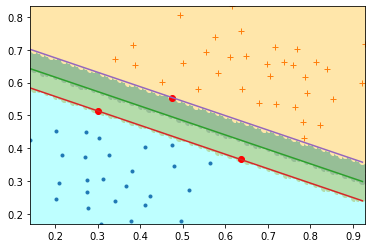

Time: 0.011964797973632812 sec


In [104]:
import matplotlib.pyplot as plt

xmin = np.min([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0])
xmax = np.max([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0])
ymin = np.min([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1])
ymax = np.max([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1])
   
plt.axis([xmin, xmax, ymin, ymax])
plot_x = np.arange(xmin, xmax, 0.01)
plot_y = np.arange(ymin, ymax, 0.01)

total_time = 0
for x_point in plot_x:
    for y_point in plot_y:
        start_time = time.time()
        fun_value = w1*x_point + w2*y_point + w0
        total_time = total_time + time.time() - start_time
        
        if fun_value >= 1:
            plt.plot(x_point, y_point, "o", color='#beffff')
        elif fun_value >=0 and fun_value < 1:
            plt.plot(x_point, y_point, "o", color='#b4dcaa')
        elif fun_value >-1 and fun_value < 0:
            plt.plot(x_point, y_point, "o", color='#96be96')
        else:
            plt.plot(x_point, y_point, "o", color='#ffe6aa')

plot_x = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if yi[data_idx] == 1 for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0])
plot_y = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if yi[data_idx] == 1 for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1])
print(plot_x)
print(plot_y)
plt.plot(plot_x, plot_y, ".")

plot_x = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if yi[data_idx] == -1 for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0])
plot_y = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if yi[data_idx] == -1 for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1])
print(plot_x)
print(plot_y)
plt.plot(plot_x, plot_y, "+")

plot_x = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(support_vectors) if abs(support_vector_coefficients[data_idx][0]) == C_cost for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0])
plot_y = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(support_vectors) if abs(support_vector_coefficients[data_idx][0]) == C_cost for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1])
#print(plot_x)
#print(plot_y)
plt.plot(plot_x, plot_y, "og")

plot_x = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(support_vectors) if abs(support_vector_coefficients[data_idx][0]) != C_cost for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0])
plot_y = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(support_vectors) if abs(support_vector_coefficients[data_idx][0]) != C_cost for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1])
#print(plot_x)
#print(plot_y)
plt.plot(plot_x, plot_y, "or")

plot_x = np.arange(
    np.min([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0]),
    np.max([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0]),
    0.01)
plot_y = (-w0-w1*plot_x)/w2
plt.plot(plot_x, plot_y)

plot_y = (1-w0-w1*plot_x)/w2
plt.plot(plot_x, plot_y)

plot_y = (-1-w0-w1*plot_x)/w2
plt.plot(plot_x, plot_y)

plt.show()
print("Time: {} sec".format(total_time))

[0.202 0.27  0.276 0.276 0.278 0.378 0.412 0.382 0.368 0.326 0.3   0.142
 0.21  0.202 0.308 0.496 0.424 0.342 0.314 0.304 0.216 0.274 0.636 0.514
 0.48  0.476 0.564 0.412]
[0.454 0.374 0.304 0.268 0.218 0.18  0.226 0.332 0.284 0.38  0.514 0.426
 0.294 0.246 0.17  0.18  0.254 0.24  0.306 0.432 0.38  0.448 0.366 0.272
 0.346 0.41  0.354 0.404]
[0.616 0.576 0.612 0.706 0.758 0.768 0.716 0.638 0.494 0.554 0.584 0.64
 0.718 0.852 0.788 0.738 0.648 0.698 0.678 0.782 0.822 0.784 0.764 0.792
 0.92  0.928 0.814 0.838 0.5   0.536 0.452 0.476 0.388 0.342 0.384]
[0.832 0.74  0.678 0.62  0.654 0.702 0.708 0.758 0.806 0.694 0.628 0.58
 0.536 0.55  0.618 0.662 0.68  0.658 0.538 0.48  0.472 0.43  0.526 0.568
 0.598 0.716 0.662 0.64  0.66  0.58  0.602 0.554 0.652 0.672 0.714]


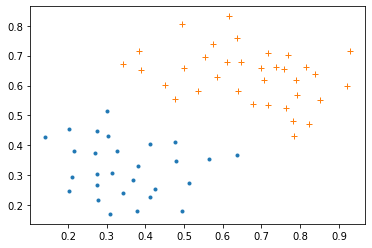

In [95]:
import matplotlib.pyplot as plt

plt.cla()
plot_x = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if yi[data_idx] == 1 for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0])
plot_y = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if yi[data_idx] == 1 for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1])
print(plot_x)
print(plot_y)
plt.plot(plot_x, plot_y, ".")

plot_x = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if yi[data_idx] == -1 for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0])
plot_y = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if yi[data_idx] == -1 for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1])
print(plot_x)
print(plot_y)
plt.plot(plot_x, plot_y, "+")

plt.show()

In [96]:
x1 = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0])
x2 = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1])
x = w1 * x1 + w2 * x2 + w0
print(x)

[ 2.75514313  3.60684352  4.75301667  5.36560186  6.20142638  6.09863228
  5.06108454  3.48218503  4.40388293  3.08507539  0.99974427  3.68124535
  5.417791    6.29452419  6.79338309  5.21432637  4.49469998  5.34744522
  4.43420768  2.36510072  3.90942836  2.31766417  1.00012642  3.51393678
  2.50953391  1.45047005  1.74389796  2.03219113 -6.77956611 -4.91430592
 -4.12908635 -3.84659064 -4.81483744 -5.70655887 -5.41896227 -5.68523383
 -5.4228611  -3.9666876  -3.06843829 -2.67132865 -2.50715462 -3.74959399
 -4.42707579 -4.80108512 -4.43290711 -4.43325539 -2.24142242 -2.03386788
 -2.19750255 -1.19804336 -2.68172149 -3.60623951 -5.07597425 -7.1438453
 -5.37063808 -5.1761393  -2.98345256 -1.89194039 -1.6367921  -0.99987068
 -2.00798131 -2.00357699 -3.03301266]


In [97]:
print(p_val)

[[2.755143830434257], [3.6068442231354467], [4.753017373867763], [5.365602558019475], [6.201427078005594], [6.098632983380831], [5.0610852398134725], [3.4821857342911358], [4.403883630287737], [3.0850760905995145], [0.9997449702878072], [3.6812460470676243], [5.417791705765708], [6.294524894421869], [6.793383786839058], [5.214327072352454], [4.494700681903524], [5.347445920503887], [4.434208383814415], [2.3651014181841674], [3.909429058507328], [2.317664873041096], [1.000127116292063], [3.5139374797212923], [2.509534609449645], [1.450470753629105], [1.7438986657610656], [2.032191829285594], [-6.7795654096479865], [-4.914305223435264], [-4.129085650327653], [-3.8465899353054596], [-4.814836739510227], [-5.7065581639465535], [-5.418961564354774], [-5.685233124695515], [-5.422860394060891], [-3.9666868945487437], [-3.068437593639416], [-2.6713279499477807], [-2.507153920299004], [-3.749593289183082], [-4.427075092060633], [-4.801084422631419], [-4.432906404600857], [-4.433254686567253], [

28 28


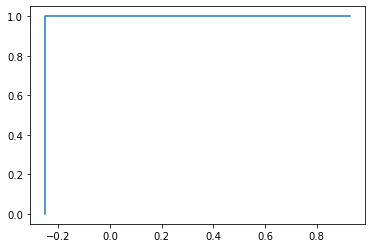

In [98]:
w1_correct = 0
w2_correct = 0

plot_x = []
plot_y = []
w1_total = sum([1 for [data] in p_val if data > 0])
w2_total = sum([1 for [data] in p_val if data > 0])
print(w1_total, w2_total)
for bias in np.arange(np.min([x]), np.max([x]), 0.1):
    y = x + bias
    #print(x, y)
    w1_correct = sum([1 for idx, _ in enumerate(y) if y[idx] > 0 and label[idx] == class_labels[0]])
    w2_correct = sum([1 for idx, _ in enumerate(y) if y[idx] < 0 and label[idx] == class_labels[1]])

    #print(w1_correct, w2_correct)
    plot_x = plot_x + [(w2_total-w2_correct) / w2_total]
    plot_y = plot_y + [w1_correct / w1_total]

plt.plot(plot_x, plot_y)   
plt.show()

In [99]:
#def naive_bayesian_classifier:

pw1 = np.sum([1 for l in label if l == class_labels[0]]) / len(dataset)
pw2 = np.sum([1 for l in label if l == class_labels[1]]) / len(dataset)

start_time = time.time()
#print(pw1, pw2)

c1f1_mean = np.mean(np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if label[data_idx] == class_labels[0] for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0]))
c1f1_var = np.var(np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if label[data_idx] == class_labels[0] for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0]))
c1f2_mean = np.mean(np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if label[data_idx] == class_labels[0] for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1]))
c1f2_var = np.var(np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if label[data_idx] == class_labels[0] for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1]))

c2f1_mean = np.mean(np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if label[data_idx] == class_labels[1] for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0]))
c2f1_var = np.var(np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if label[data_idx] == class_labels[1] for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0]))
c2f2_mean = np.mean(np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if label[data_idx] == class_labels[1] for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1]))
c2f2_var = np.var(np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if label[data_idx] == class_labels[1] for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1]))

#print(class1_mean, class1_var)
#print(class2_mean, class2_var)

result = np.arange(len(dataset))
#print(result)

correct = 0
for data_idx, data in enumerate(dataset):
    pw1x = - (data[1]-c1f1_mean)*(data[1]-c1f1_mean)/2/c1f1_var - (data[2]-c1f2_mean)*(data[2]-c1f2_mean)/2/c1f2_var + math.log(pw1)
    pw2x = - (data[1]-c2f1_mean)*(data[1]-c2f1_mean)/2/c2f1_var - (data[2]-c2f2_mean)*(data[2]-c2f2_mean)/2/c2f2_var + math.log(pw2)
    #pw1x = math.exp(- (data[1]-c1f1_mean)*(data[1]-c1f1_mean)/2/c1f1_var - (data[2]-c1f2_mean)*(data[2]-c1f2_mean)/2/c1f2_var)
    #pw2x = math.exp(- (data[1]-c2f1_mean)*(data[1]-c2f1_mean)/2/c2f1_var - (data[2]-c2f2_mean)*(data[2]-c2f2_mean)/2/c2f2_var)

    result[data_idx] = class_labels[0] if pw1x > pw2x else class_labels[1]
    if result[data_idx] == label[data_idx]:
        correct = correct + 1

end_time = time.time()

print("Accuracy: {}%".format(correct / len(dataset) * 100))
print("Time: {} sec".format(end_time - start_time))


Accuracy: 100.0%
Time: 0.002020597457885742 sec


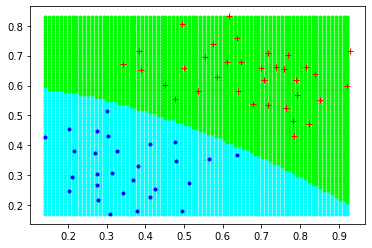

In [27]:
import matplotlib.pyplot as plt

#plt.figure(figsize=(20,15))
plt.cla()

plot_x = np.arange(
    np.min([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0]),
    np.max([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0]),
    0.01)
plot_y = np.arange(
    np.min([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1]),
    np.max([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1]),
    0.01)

for x_point in plot_x:
    for y_point in plot_y:
        pw1x = - (x_point-c1f1_mean)*(x_point-c1f1_mean)/2/c1f1_var - (y_point-c1f2_mean)*(y_point-c1f2_mean)/2/c1f2_var + math.log(pw1)
        pw2x = - (x_point-c2f1_mean)*(x_point-c2f1_mean)/2/c2f1_var - (y_point-c2f2_mean)*(y_point-c2f2_mean)/2/c2f2_var + math.log(pw2)
        
        #pw1x = math.exp(- (x_point-c1f1_mean)*(x_point-c1f1_mean)/2/c1f1_var - (y_point-c1f2_mean)*(y_point-c1f2_mean)/2/c1f2_var)
        #pw2x = math.exp(- (x_point-c2f1_mean)*(x_point-c2f1_mean)/2/c2f1_var - (y_point-c2f2_mean)*(y_point-c2f2_mean)/2/c2f2_var)
        
        if pw1x > pw2x:
            plt.plot(x_point, y_point, ".", color='#00FFFF')
        else:
            plt.plot(x_point, y_point, ".", color='#00FF00')

plot_x = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if yi[data_idx] == 1 for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0])
plot_y = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if yi[data_idx] == 1 for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1])
#print(plot_x)
#print(plot_y)
plt.plot(plot_x, plot_y, ".b")

plot_x = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if yi[data_idx] == -1 for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0])
plot_y = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if yi[data_idx] == -1 for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1])
#print(plot_x)
#print(plot_y)
plt.plot(plot_x, plot_y, "+r")

plt.show()

In [78]:
#def bayesian_classifier:

pw1 = np.sum([1 for l in label if l == class_labels[0]]) / len(dataset)
pw2 = np.sum([1 for l in label if l == class_labels[1]]) / len(dataset)

start_time = time.time()
#print(pw1, pw2)

c1 = np.array([
    [data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if label[data_idx] == class_labels[0] for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0],
    [data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if label[data_idx] == class_labels[0] for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1]])
c1invcov = np.linalg.inv(np.cov(c1))
c2 = np.array([
    [data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if label[data_idx] == class_labels[1] for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0],
    [data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if label[data_idx] == class_labels[1] for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1]])
c2invcov = np.linalg.inv(np.cov(c2))

#print(c1, c2)
#print(c1invcov, c2invcov)

result = np.arange(len(dataset))
#print(result)

correct = 0
for data_idx, data in enumerate(dataset):
    a = np.array([[data[1]-c1f1_mean, data[2]-c1f2_mean]])
    pw1x = -np.dot(np.dot(a, c1invcov), a.T)/2 + math.log(pw1)
    a = np.array([[data[1]-c2f1_mean, data[2]-c2f2_mean]])
    pw2x = -np.dot(np.dot(a, c2invcov), a.T)/2 + math.log(pw2)

    result[data_idx] = class_labels[0] if pw1x > pw2x else class_labels[1]
    if result[data_idx] == label[data_idx]:
        correct = correct + 1
end_time = time.time()

print("Accuracy: {}%".format(correct / len(dataset) * 100))
print("Time: {} sec".format(end_time - start_time))

Accuracy: 100.0%
Time: 0.0029625892639160156 sec


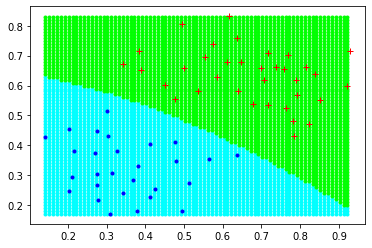

In [29]:
import matplotlib.pyplot as plt

#plt.figure(figsize=(20,15))
plt.cla()

plot_x = np.arange(
    np.min([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0]),
    np.max([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0]),
    0.01)
plot_y = np.arange(
    np.min([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1]),
    np.max([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1]),
    0.01)

for x_point in plot_x:
    for y_point in plot_y:
        a = np.array([[x_point-c1f1_mean, y_point-c1f2_mean]])
        pw1x = -np.dot(np.dot(a, c1invcov), a.T)/2 + math.log(pw1)
        a = np.array([[x_point-c2f1_mean, y_point-c2f2_mean]])
        pw2x = -np.dot(np.dot(a, c2invcov), a.T)/2 + math.log(pw2)
        
        if pw1x > pw2x:
            plt.plot(x_point, y_point, ".", color='#00FFFF')
        else:
            plt.plot(x_point, y_point, ".", color='#00FF00')

plot_x = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if yi[data_idx] == 1 for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0])
plot_y = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if yi[data_idx] == 1 for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1])
#print(plot_x)
#print(plot_y)
plt.plot(plot_x, plot_y, ".b")

plot_x = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if yi[data_idx] == -1 for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0])
plot_y = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if yi[data_idx] == -1 for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1])
#print(plot_x)
#print(plot_y)
plt.plot(plot_x, plot_y, "+r")

plt.show()

In [79]:
#def Percepron_classifier:

w0 = 1
w1 = 1
w2 = 1
tou = 0.01

start_time = time.time()
for iter in range(50):
    correct = 0
    for data_idx, data in enumerate(dataset):
        result[data_idx] = class_labels[0] if w1*data[1] + w2*data[2] + w0 > 0 else class_labels[1]
        if result[data_idx] == label[data_idx]:
            correct = correct + 1
        else:
            w1 = w1 + tou*data[1] if label[data_idx] == class_labels[0] else w1 - tou*data[1]
            w2 = w2 + tou*data[2] if label[data_idx] == class_labels[0] else w2 - tou*data[2]
            w0 = w0 + tou if label[data_idx] == class_labels[0] else w0 - tou
        
end_time = time.time()

print("Iteration: {}, Accuracy: {}%".format(iter, correct / len(dataset) * 100))
print("Time: {} sec".format(end_time - start_time))

Iteration: 49, Accuracy: 100.0%
Time: 0.007977724075317383 sec


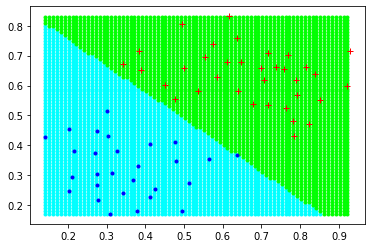

In [150]:
import matplotlib.pyplot as plt

#plt.figure(figsize=(20,15))
plt.cla()

plot_x = np.arange(
    np.min([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0]),
    np.max([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0]),
    0.01)
plot_y = np.arange(
    np.min([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1]),
    np.max([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1]),
    0.01)

for x_point in plot_x:
    for y_point in plot_y:
        if w1*x_point + w2*y_point + w0 > 0:
            plt.plot(x_point, y_point, ".", color='#00FFFF')
        else:
            plt.plot(x_point, y_point, ".", color='#00FF00')

plot_x = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if yi[data_idx] == 1 for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0])
plot_y = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if yi[data_idx] == 1 for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1])
#print(plot_x)
#print(plot_y)
plt.plot(plot_x, plot_y, ".b")

plot_x = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if yi[data_idx] == -1 for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0])
plot_y = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(dataset) if yi[data_idx] == -1 for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1])
#print(plot_x)
#print(plot_y)
plt.plot(plot_x, plot_y, "+r")

plt.show()